In [1]:
import pandas as pd

# CSVファイルを読み込む
df = pd.read_csv('emdat.csv')

# データの先頭5行を表示
print(df.head())

# データの情報を表示
print(df.info())

  Disaster Subgroup      Disaster Type  Disaster Subtype  ISO  \
0    Meteorological              Storm  Tropical cyclone  USA   
1      Hydrological              Flood   Flood (General)  JAM   
2        Biological           Epidemic     Viral disease  JAM   
3       Geophysical  Volcanic activity          Ash fall  JPN   
4       Geophysical         Earthquake   Ground movement  TUR   

                    Country                        Subregion    Region  \
0  United States of America                 Northern America  Americas   
1                   Jamaica  Latin America and the Caribbean  Americas   
2                   Jamaica  Latin America and the Caribbean  Americas   
3                     Japan                     Eastern Asia      Asia   
4                   Türkiye                     Western Asia      Asia   

   Latitude  Longitude  Start Year  Total Deaths  
0       NaN        NaN        1900        6000.0  
1       NaN        NaN        1900         300.0  
2       NaN

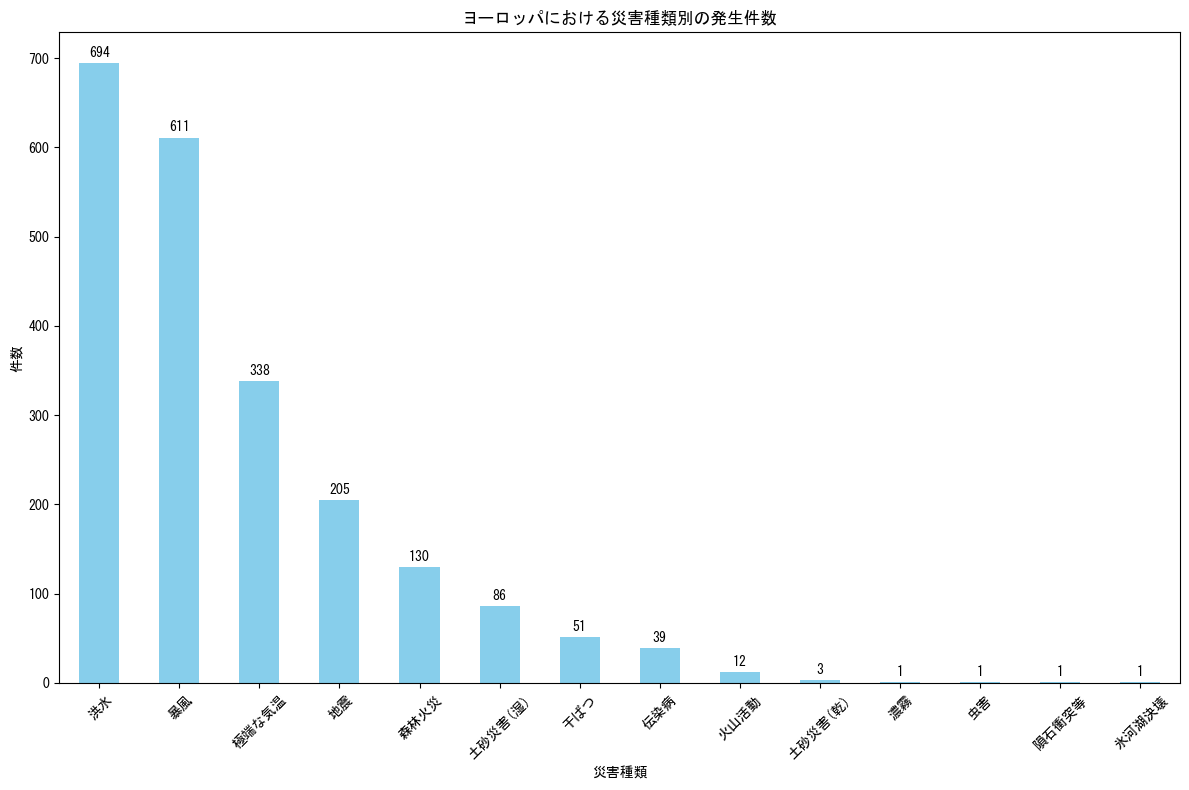

グラフを作成しました。


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 【重要】Windows標準フォント「MSゴシック」を指定
plt.rcParams['font.family'] = 'MS Gothic'

# 1. データの読み込み
df = pd.read_csv('emdat.csv')

# 2. ヨーロッパのデータを抽出
europe_df = df[df['Region'] == 'Europe'].copy()

# 3. 災害名を日本語に変換するための辞書
translation_map = {
    'Flood': '洪水',
    'Storm': '暴風',
    'Extreme temperature': '極端な気温',
    'Earthquake': '地震',
    'Wildfire': '森林火災',
    'Landslide': '地滑り',
    'Mass movement (wet)': '土砂災害(湿)',
    'Mass movement (dry)': '土砂災害(乾)',
    'Drought': '干ばつ',
    'Epidemic': '伝染病',
    'Volcanic activity': '火山活動',
    'Insect infestation': '虫害',
    'Infestation': '虫害',
    'Impact': '隕石衝突等',
    'Fog': '濃霧',
    'Glacial lake outburst flood': '氷河湖決壊',
    'Animal incident': '動物被害'
}

# 災害名を日本語に変換
europe_df['Disaster Type JP'] = europe_df['Disaster Type'].map(translation_map).fillna(europe_df['Disaster Type'])

# 4. 集計
counts = europe_df['Disaster Type JP'].value_counts()

# 5. グラフの作成
plt.figure(figsize=(12, 8))
# グラフを変数 'ax' に格納します（後で数値を追加するために必要）
ax = counts.plot(kind='bar', color='skyblue')

plt.title('ヨーロッパにおける災害種類別の発生件数')
plt.xlabel('災害種類')
plt.ylabel('件数')
plt.xticks(rotation=45)

# 【追加機能】各バーの上に数値を書く
# グラフに含まれるバー（rect）を一つずつ取り出して処理します
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3ポイント上にずらす
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig('europe_disaster_counts_labeled.png')
plt.show()

print("グラフを作成しました。")

グラフ作成

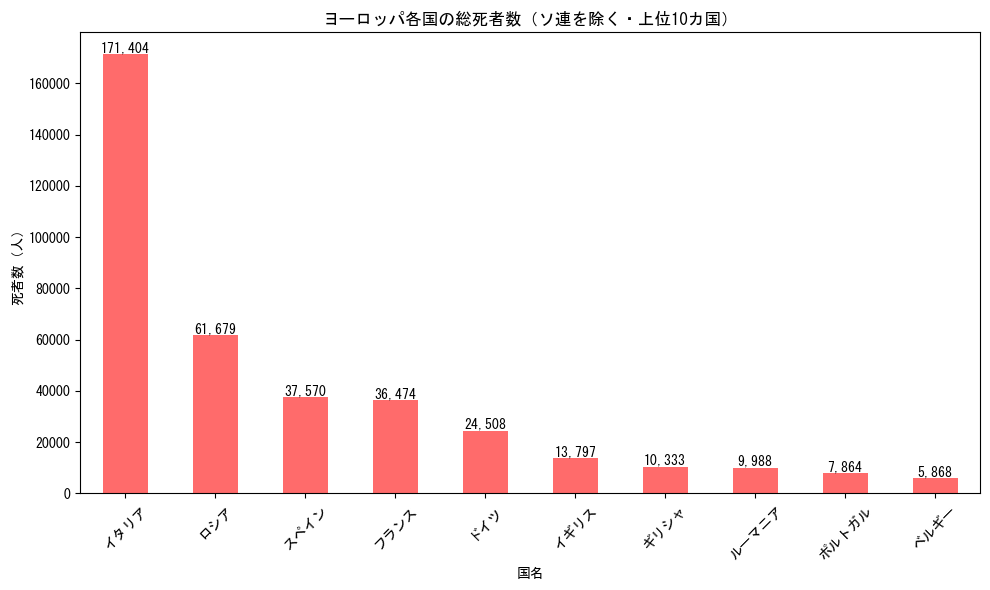

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Windows用フォント設定
plt.rcParams['font.family'] = 'MS Gothic'

# データの準備（上のコードと同じ処理）
df = pd.read_csv('emdat.csv')
europe_df = df[df['Region'] == 'Europe'].copy()
europe_df = europe_df[europe_df['Country'] != 'Soviet Union'] # ソ連除外

# 国名翻訳（簡略版）
country_translation_map = {
    'France': 'フランス', 'Italy': 'イタリア', 'Russian Federation': 'ロシア',
    'Spain': 'スペイン', 'Greece': 'ギリシャ', 
    'United Kingdom of Great Britain and Northern Ireland': 'イギリス',
    'Romania': 'ルーマニア', 'Germany': 'ドイツ', 'Belgium': 'ベルギー',
    'Poland': 'ポーランド', 'Portugal': 'ポルトガル', 'Netherlands (Kingdom of the)': 'オランダ'
}
europe_df['Country JP'] = europe_df['Country'].map(country_translation_map).fillna(europe_df['Country'])

# 集計
top10_deaths = europe_df.groupby('Country JP')['Total Deaths'].sum().sort_values(ascending=False).head(10)

# グラフ作成
plt.figure(figsize=(10, 6))
# 棒グラフを描画（赤色）
ax = top10_deaths.plot(kind='bar', color='#ff6b6b')

plt.title('ヨーロッパ各国の総死者数（ソ連を除く・上位10カ国）')
plt.xlabel('国名')
plt.ylabel('死者数（人）')
plt.xticks(rotation=45)

# 数値をバーの上に表示
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import folium

# ---------------------------------------------------------
# 1. データの読み込みと前処理
# ---------------------------------------------------------
file_name = 'emdat.csv'
output_html = 'europe_disaster_map_layered.html'

try:
    df = pd.read_csv(file_name)

    # ヨーロッパのデータで、かつ緯度経度があるものを抽出
    europe_df = df[(df['Region'] == 'Europe') & df['Latitude'].notna() & df['Longitude'].notna()].copy()

    # 日本語への翻訳辞書
    translation_map = {
        'Flood': '洪水',
        'Storm': '暴風',
        'Extreme temperature': '極端な気温',
        'Earthquake': '地震',
        'Wildfire': '森林火災',
        'Landslide': '地滑り',
        'Mass movement (wet)': '土砂災害(湿)',
        'Mass movement (dry)': '土砂災害(乾)',
        'Drought': '干ばつ',
        'Epidemic': '伝染病',
        'Volcanic activity': '火山活動',
        'Insect infestation': '虫害',
        'Infestation': '虫害',
        'Impact': '隕石衝突等',
        'Fog': '濃霧',
        'Glacial lake outburst flood': '氷河湖決壊',
        'Animal incident': '動物被害'
    }

    # 災害種類を日本語に変換
    europe_df['Disaster Type JP'] = europe_df['Disaster Type'].map(translation_map).fillna(europe_df['Disaster Type'])

    # ---------------------------------------------------------
    # 2. 地図の作成
    # ---------------------------------------------------------
    # ヨーロッパの中心付近に地図をセット
    m = folium.Map(location=[51.0, 10.0], zoom_start=4)

    # ---------------------------------------------------------
    # 3. 災害種類ごとにレイヤー（層）を作って追加
    # ---------------------------------------------------------
    # データに含まれる災害種類のリストを取得
    disaster_types = europe_df['Disaster Type JP'].unique()

    # 各災害種類ごとにグループを作成
    for disaster_type in disaster_types:
        # その災害種類のデータだけを取り出す
        subset = europe_df[europe_df['Disaster Type JP'] == disaster_type]
        
        # FeatureGroupを作成（これが「表示・非表示」の単位になります）
        # name=引数に指定した名前が、地図上のメニューに表示されます
        fg = folium.FeatureGroup(name=disaster_type)
        
        # その種類の災害マーカーをグループに追加
        for index, row in subset.iterrows():
            # ポップアップ表示内容
            popup_content = f"""
            <div style="width:200px">
                <b>種類:</b> {row['Disaster Type JP']}<br>
                <b>国:</b> {row['Country']}<br>
                <b>年:</b> {row['Start Year']}<br>
                <b>死者数:</b> {row['Total Deaths'] if pd.notna(row['Total Deaths']) else '不明'}
            </div>
            """
            
            # マーカーの色を種類によって少し変える（簡易的な例）
            icon_color = 'blue'
            if disaster_type == '洪水': icon_color = 'darkblue'
            elif disaster_type == '暴風': icon_color = 'orange'
            elif disaster_type == '極端な気温': icon_color = 'red'
            elif disaster_type == '地震': icon_color = 'green'
            elif disaster_type == '森林火災': icon_color = 'darkred'

            folium.Marker(
                location=[row['Latitude'], row['Longitude']],
                popup=folium.Popup(popup_content, max_width=300),
                icon=folium.Icon(color=icon_color, icon='info-sign')
            ).add_to(fg)
        
        # 作成したグループ（レイヤー）を地図に追加
        fg.add_to(m)

    # ---------------------------------------------------------
    # 4. コントロールパネル（レイヤー切り替えボタン）の追加
    # ---------------------------------------------------------
    # これを追加することで、右上にレイヤーのON/OFFメニューが表示されます
    folium.LayerControl(collapsed=False).add_to(m)

    # 保存
    m.save(output_html)
    print(f"地図を '{output_html}' に保存しました。")
    print("ブラウザで開くと、右上のメニューから災害種類ごとに表示/非表示を切り替えられます。")

except Exception as e:
    print(f"エラーが発生しました: {e}")

地図を 'europe_disaster_map_layered.html' に保存しました。
ブラウザで開くと、右上のメニューから災害種類ごとに表示/非表示を切り替えられます。


# ヨーロッパ災害マップ作成の分析結果と考察

## 1. 実行結果 (Results)

Pythonの `folium` ライブラリを用いて、ヨーロッパにおける災害発生地点をプロットしたインタラクティブな地図（`europe_disaster_map_layered.html`）を作成しました。

**作成された地図の主な特徴:**

* **視覚的分布**: ヨーロッパ全土の地図上に、災害発生地点がピン（マーカー）で表示されました。
* **災害種別の色分け**: 災害の種類ごとにマーカーの色を変更しました（例: 洪水=青、暴風=オレンジ、極端な気温=赤、地震=緑）。これにより、地図上での識別が容易になりました。
* **レイヤー切り替え機能 (Layer Control)**: 地図右上のコントロールパネルを使用することで、災害種類ごとの「表示/非表示」を切り替える機能を実装しました。
* **詳細情報のポップアップ**: 各マーカーをクリックすると、「発生年」「国名」「死者数」などの詳細情報が表示されるように設定しました。

## 2. 感想・考察 (Discussion)

今回のマップ作成と分析を通じて、以下の知見が得られました。

### ① 地理的な傾向の可視化
棒グラフによる数量の比較だけでは分からなかった「場所」の傾向を把握できました。
* **暴風 (Storm)**: イギリスやフランスなどの大西洋沿岸部に集中している傾向が見られました。
* **地震 (Earthquake)**: イタリア、ギリシャ、トルコ周辺などの南欧・東欧地域に発生地点が多く分布していました。

### ② 情報の取捨選択（レイヤー機能）の重要性
データ件数が多いため、すべての災害を一度に表示するとマーカーが重なり合い、視認性が低下することが課題でした。
今回実装した「レイヤー切り替え機能」により、特定の災害（例：洪水のみ）に焦点を絞って分布を確認できるようになり、地図の実用性が大幅に向上しました。データの可視化においては、情報を網羅するだけでなく、ユーザーが見たい情報を選択できるインタラクティブ性が重要であると実感しました。

### ③ データの制約に関する気づき
コード作成の過程で、元のデータセットには `Latitude`（緯度）と `Longitude`（経度）が記録されていないデータも多数存在することが判明しました。
したがって、この地図に表示されているのは位置情報が存在する一部のデータに限られており、実際の発生件数より少なく表示されている可能性があります。より正確な地理的分析を行うには、位置情報の欠損を補完するか、国単位の色塗り地図（コロプレスマップ）などの代替手段を検討する必要があると考えられます。

## 3. まとめ (Conclusion)
Pythonを活用することで、数値データから地理的な情報を抽出し、地図として可視化することに成功しました。特に対話的な機能（レイヤー操作）の実装は、データの閲覧者が分析を行いやすくするための有効な手段であり、データ分析レポートの質を高める重要な要素であると学びました。